 <div style="background-color:#f0f8ff; padding:20px; border-radius:10px; border-left: 6px solid #4a90e2;">,
         <h1 style="color:#333;">📝 CSV a Inserts de SQL</h1>
        <h3 style="color:#555;">👤 Autor: aUreLi0_triste</h3>
</div>

Leeremos un CSV no normalizado y normalizarlo con los inserts

In [1]:
from IPython.display import Image
import pandas as pd

## Determinar orden de llenado de tablas

El orden es el mismo que aparece en la imagen (primero entidades fuertes y luego las debiles)

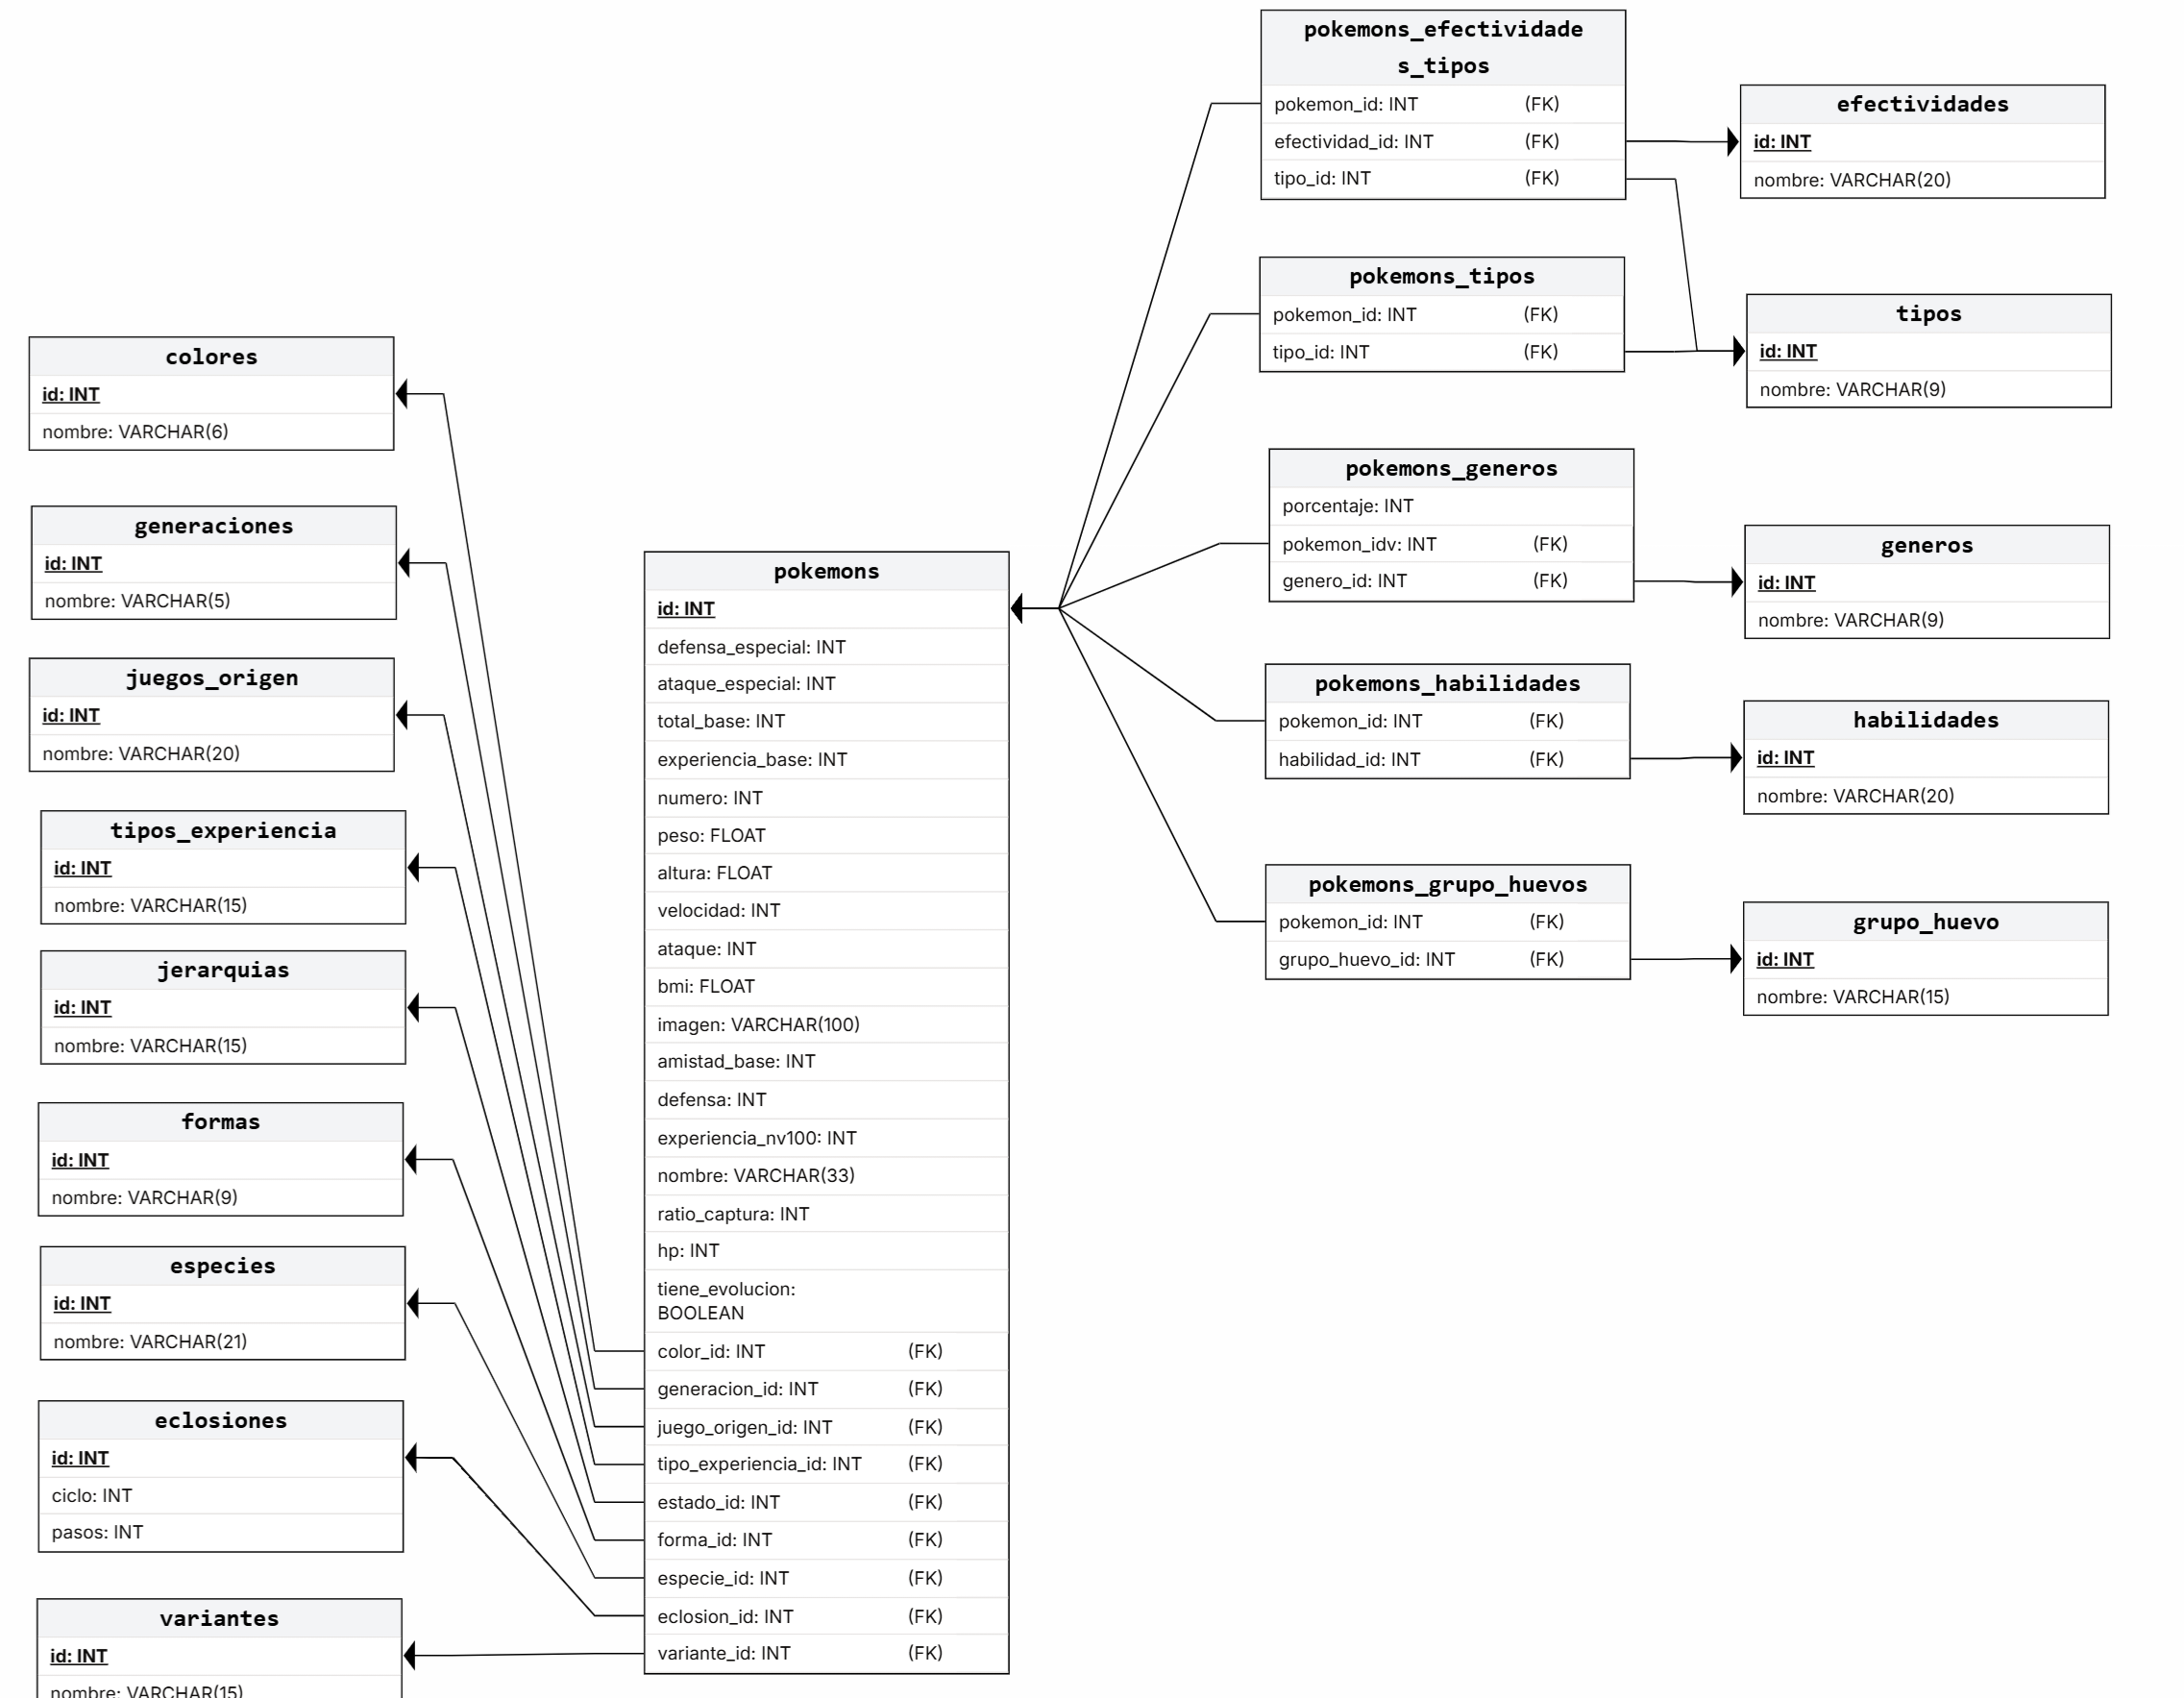

In [4]:
Image(filename='C:/Users/aUreLi0/Downloads/Diagrama_Pokemon.png')

## Llenar tablas en orden

Lectura inicial del archivo CSV

In [2]:
ds_pokemon = pd.read_excel('ALL POKEMON DATABASE_1.xlsx')

In [7]:
ds_pokemon

,Pokédex No.,Name,Species,Color,Shape,Type 1,Type 2,Ability 1,Ability 2,Ability 3,...,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI (Body Mass Index),Game of Origin,Image URLs
0,1,Bulbasaur,Seed Pokémon,Green,Quadruped,Grass,Poison,Chlorophyll,Overgrow,-,...,Normal,Normal,Normal,Normal,Not very effective,0.7,6.9,14.1,Pokémon Red,https://archives.bulbagarden.net/media/upload/...
1,2,Ivysaur,Seed Pokémon,Green,Quadruped,Grass,Poison,Chlorophyll,Overgrow,-,...,Normal,Normal,Normal,Normal,Not very effective,1.0,13.0,13.0,Pokémon Red,https://archives.bulbagarden.net/media/upload/...
2,3,Venusaur,Seed Pokémon,Green,Quadruped,Grass,Poison,Chlorophyll,Overgrow,-,...,Normal,Normal,Normal,Normal,Not very effective,2.0,100.0,25.0,Pokémon Red,https://archives.bulbagarden.net/media/upload/...
3,3,Mega Venusaur,Seed Pokémon,Green,Quadruped,Grass,Poison,Thick Fat,-,-,...,Normal,Normal,Normal,Normal,Not very effective,2.4,155.5,27.0,Pokémon X,https://archives.bulbagarden.net/media/upload/...
4,4,Charmander,Lizard Pokémon,Red,Upright,Fire,-,Blaze,Solar Power,-,...,Normal,Normal,Normal,Not very effective,Not very effective,0.6,8.5,23.6,Pokémon Red,https://archives.bulbagarden.net/media/upload/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,896,Glastrier,Wild Horse Pokémon,White,Quadruped,Ice,-,Chilling Neigh,-,-,...,Normal,Normal,Normal,Super Effective,Normal,2.2,800.0,165.3,Pokémon Sword,https://archives.bulbagarden.net/media/upload/...
1028,897,Spectrier,Swift Horse Pokémon,Black,Quadruped,Ghost,-,Grim Neigh,-,-,...,Super Effective,Normal,Super Effective,Normal,Normal,2.0,44.5,11.1,Pokémon Sword,https://archives.bulbagarden.net/media/upload/...
1029,898,Calyrex,King Pokémon,Green,Humanoid,Psychic,Grass,Unnerve,-,-,...,Super Effective,Normal,Super Effective,Normal,Normal,1.1,7.7,6.4,Pokémon Sword,https://archives.bulbagarden.net/media/upload/...
1030,898,Calyrex Ice Rider,High King Pokémon,Green,Humanoid,Psychic,Ice,As One,-,-,...,Super Effective,Normal,Super Effective,Super Effective,Normal,2.4,809.1,140.5,Pokémon Sword,https://archives.bulbagarden.net/media/upload/...


La primera tabla es: 
```sql
CREATE TABLE colores (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nombre VARCHAR(6) NOT NULL
);
```

In [7]:
color = ds_pokemon['Color']
color_names = []
#Iterar lista
for row in color:
    if not pd.isna(row):
        lista = row.split(', ') 
        for c in lista:
            if c not in color_names:
                color_names.append(c)
            
#print(color_names)

#INSERT INTO color (id,name) VALUES (1, 'XD')
color_names.sort()
text = '-- migration: up \n\n'
id = 1
for ps in color_names:
    text = text + f"INSERT INTO color (id,name) VALUES ({id}, '{ps}');\n"
    id = id +1
text = text + '\n-- migration:down \n\n DELETE FROM color;'
with open("021_fill_color.sql","w") as archivo: 
    archivo.write(text)

La segunda tabla es: 
```sql
CREATE TABLE generaciones (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nombre VARCHAR(5) NOT NULL
);
```

In [3]:
generacion = ds_pokemon['Generation']
generacion = list(generacion.unique())

text = '-- migration: up \n\n'
id = 1
for ps in generacion:
    text = text + f"INSERT INTO generacion (id,name) VALUES ({id}, '{ps}');\n"
    id = id +1
text = text + '\n-- migration:down \n\n DELETE FROM generacion;'
with open("022_fill_generacion.sql","w") as archivo: 
    archivo.write(text)

La tercera tabla es: 
```sql
CREATE TABLE juegos_origen (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nombre VARCHAR(20) NOT NULL
);
```

In [ ]:
juegos_origen = ds_pokemon['Generation']
juegos_origen = list(juegos_origen.unique())

text = '-- migration: up \n\n'
id = 1
for ps in juegos_origen:
    text = text + f"INSERT INTO juegos_origen (id,name) VALUES ({id}, '{ps}');\n"
    id = id +1
text = text + '\n-- migration:down \n\n DELETE FROM juegos_origen;'
with open("023_fill_juegos_origen.sql","w") as archivo: 
    archivo.write(text)

La cuarta tabla es: 
```sql
CREATE TABLE tipos_experiencia (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nombre VARCHAR(15) NOT NULL
);
```

In [9]:
tipos_experiencia = ds_pokemon['Generation']
tipos_experiencia = list(tipos_experiencia.unique())

text = '-- migration: up \n\n'
id = 1
for ps in tipos_experiencia:
    text = text + f"INSERT INTO tipos_experiencia (id,name) VALUES ({id}, '{ps}');\n"
    id = id +1
text = text + '\n-- migration:down \n\n DELETE FROM tipos_experiencia;'
with open("024_fill_tipos_experiencia.sql","w") as archivo: 
    archivo.write(text)

La quinta tabla es: 
```sql
CREATE TABLE jerarquias (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nombre VARCHAR(15) NOT NULL
);
```

In [10]:
jerarquias = ds_pokemon['Status']
jerarquias = list(jerarquias.unique())

text = '-- migration: up \n\n'
id = 1
for ps in jerarquias:
    text = text + f"INSERT INTO jerarquias (id,name) VALUES ({id}, '{ps}');\n"
    id = id +1
text = text + '\n-- migration:down \n\n DELETE FROM jerarquias;'
with open("025_fill_jerarquias.sql","w") as archivo: 
    archivo.write(text)

La sexta tabla es
```sql
CREATE TABLE formas (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nombre VARCHAR(9) NOT NULL
);
```

In [11]:
formas = ds_pokemon['Shape']
formas = list(formas.unique())

text = '-- migration: up \n\n'
id = 1
for ps in formas:
    text = text + f"INSERT INTO formas (id,name) VALUES ({id}, '{ps}');\n"
    id = id +1
text = text + '\n-- migration:down \n\n DELETE FROM formas;'
with open("026_fill_formas.sql","w") as archivo: 
    archivo.write(text)

La septima tabla es
```sql
CREATE TABLE especies (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nombre VARCHAR(21) NOT NULL
);
```

In [17]:
especies = ds_pokemon['Species']
especies = list(especies.unique())

text = '-- migration: up \n\n'
id = 1
for ps in especies:
    text = text + f"INSERT INTO especies (id,name) VALUES ({id}, '{ps}');\n"
    id = id +1
text = text + '\n-- migration:down \n\n DELETE FROM especies;'
with open("027_fill_especies.sql","w") as archivo: 
    archivo.write(text)

La octava tabla es
```sql
CREATE TABLE eclosiones (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    ciclo INTEGER NOT NULL,
    pasos INTEGER NOT NULL
);
```

In [ ]:
import numpy as np

ds_pokemon['Egg Cycles'] = (
    ds_pokemon['Egg Cycles']
    .mask(ds_pokemon['Egg Cycles'] == '-', np.nan)  # reemplaza "-" por NaN sin warning
    .dropna()
    .astype(int)
)


ds_pokemon['Total Steps'] = (
    ds_pokemon['Total Steps']
    .astype(str)
    .str.replace(',', '')   # Elimina comas "5,140" → "5140"
    .astype(int)
)

# Obtener las columnas
ciclos = ds_pokemon['Egg Cycles']
pasos = ds_pokemon['Total Steps']

# Combinar en tuplas (eliminar duplicados si quieres)
eclosiones = list(set(zip(ciclos, pasos)))

# Ordenar opcionalmente
eclosiones.sort()

text = '-- migration: up \n\n'
id = 1
for ciclo, paso in eclosiones:
    text += f"INSERT INTO eclosiones (id, ciclo, pasos) VALUES ({id}, {ciclo}, {paso});\n"
    id += 1

text += '\n-- migration: down\n\nDELETE FROM eclosiones;'

with open("028_fill_eclosiones.sql", "w", encoding="utf-8") as archivo:
    archivo.write(text)
